In [1]:
import pandas as pd
import hmmlearn as hmm
import tslearn
from tslearn.clustering import TimeSeriesKMeans
import numpy as np
import matplotlib.pyplot as plt
from tslearn.utils import to_time_series_dataset
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import datetime

C:\Users\met48\AppData\Local\Temp\ipykernel_23904\2685784558.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
C:\Users\met48\AppData\Local\anaconda3\Lib\site-packages\tslearn\bases\bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


In [3]:
poor = pd.read_csv("SimData/bank_reserves_outputs_poor.csv", header=None)
middle = pd.read_csv("SimData/bank_reserves_outputs_middle.csv", header=None)
rich = pd.read_csv("SimData/bank_reserves_outputs_rich.csv", header=None)

# Principal Component Analysis

In [19]:
sc = StandardScaler()
pca = PCA()
bank_reserves_PCA_list = list()
bank_reserves_PCA_std_list = list()
for i in np.arange(0, poor.shape[0]):
    if(i % 500==0):
        print("On iteration ", i, "at ", datetime.datetime.now())
    sample = pd.concat((poor.iloc[i], middle.iloc[i]), axis=1)
    sample = pd.concat((sample, rich.iloc[i]), axis=1)
    sample_std = sc.fit_transform(sample)
    sample_PCA = pca.fit_transform(sample)
    sample_PCA_std = pca.fit_transform(sample_std)
    bank_reserves_PCA_list.append(pd.Series(sample_PCA[0:9].flatten())) 
    bank_reserves_PCA_std_list.append(pd.Series(sample_PCA_std[0:9].flatten())) 
bank_reserves_PCA = pd.DataFrame(bank_reserves_PCA_list)
bank_reserves_PCA_std = pd.DataFrame(bank_reserves_PCA_std_list)

On iteration  0 at  2024-08-15 10:47:21.685370
On iteration  500 at  2024-08-15 10:47:24.285922
On iteration  1000 at  2024-08-15 10:47:26.873670
On iteration  1500 at  2024-08-15 10:47:29.430412
On iteration  2000 at  2024-08-15 10:47:32.021132
On iteration  2500 at  2024-08-15 10:47:34.676311
On iteration  3000 at  2024-08-15 10:47:37.248891
On iteration  3500 at  2024-08-15 10:47:39.826638
On iteration  4000 at  2024-08-15 10:47:42.640803
On iteration  4500 at  2024-08-15 10:47:45.295838
On iteration  5000 at  2024-08-15 10:47:47.880197
On iteration  5500 at  2024-08-15 10:47:50.451161
On iteration  6000 at  2024-08-15 10:47:53.026183
On iteration  6500 at  2024-08-15 10:47:55.591631
On iteration  7000 at  2024-08-15 10:47:58.162721
On iteration  7500 at  2024-08-15 10:48:00.782979
On iteration  8000 at  2024-08-15 10:48:03.393436
On iteration  8500 at  2024-08-15 10:48:05.984122
On iteration  9000 at  2024-08-15 10:48:08.575482
On iteration  9500 at  2024-08-15 10:48:11.133188
On i

On iteration  81000 at  2024-08-15 10:54:26.099016
On iteration  81500 at  2024-08-15 10:54:28.691914
On iteration  82000 at  2024-08-15 10:54:31.328727
On iteration  82500 at  2024-08-15 10:54:33.972210
On iteration  83000 at  2024-08-15 10:54:36.527076
On iteration  83500 at  2024-08-15 10:54:39.178068
On iteration  84000 at  2024-08-15 10:54:41.736825
On iteration  84500 at  2024-08-15 10:54:44.364925
On iteration  85000 at  2024-08-15 10:54:46.940585
On iteration  85500 at  2024-08-15 10:54:49.487031
On iteration  86000 at  2024-08-15 10:54:52.098673
On iteration  86500 at  2024-08-15 10:54:54.931637
On iteration  87000 at  2024-08-15 10:54:58.576982
On iteration  87500 at  2024-08-15 10:55:02.397900
On iteration  88000 at  2024-08-15 10:55:05.885551
On iteration  88500 at  2024-08-15 10:55:09.074207
On iteration  89000 at  2024-08-15 10:55:12.242428
On iteration  89500 at  2024-08-15 10:55:16.887765
On iteration  90000 at  2024-08-15 10:55:20.976039
On iteration  90500 at  2024-08

In [20]:
bank_reserves_PCA.to_csv('/Users/maria/Desktop/TS-Clustering/extracted_features/bank_reserves_PCA.csv')
bank_reserves_PCA_std.to_csv('/Users/maria/Desktop/TS-Clustering/extracted_features/bank_reserves_PCA_standardized.csv')

# ARMA

In [36]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.varmax import VARMAX

sc = StandardScaler()
bank_reserves_ARMA = pd.DataFrame()
bank_reserves_ARMA_std = pd.DataFrame()

bank_reserves_ARMA_list = list()
bank_reserves_ARMA_std_list = list()

#for i in np.arange(0, poor.shape[0]):
for i in np.arange(0, 1):
    sample = pd.concat((poor.iloc[i], middle.iloc[i]), axis=1)
    sample = pd.concat((sample, rich.iloc[i]), axis=1)
    
    sample_poor = poor.iloc[i]
    #sample_poor_std = sc.fit_transform(sample_poor)
    
    sample_ARMA = ARIMA(sample_poor, order=(1, 1, 1))
    #sample_ARMA_std = ARIMA(sample_poor_std, order=(1, 1, 1))
    print(sample_ARMA.summary())
    #bank_reserves_ARMA_list.append() 
    #bank_reserves_ARMA_std.append() 

AttributeError: 'ARIMA' object has no attribute 'summary'

<Axes: >

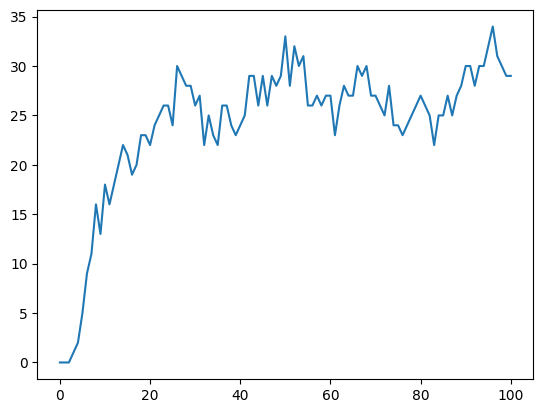

In [38]:
sample_poor = poor.iloc[1]
sample_poor.plot()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

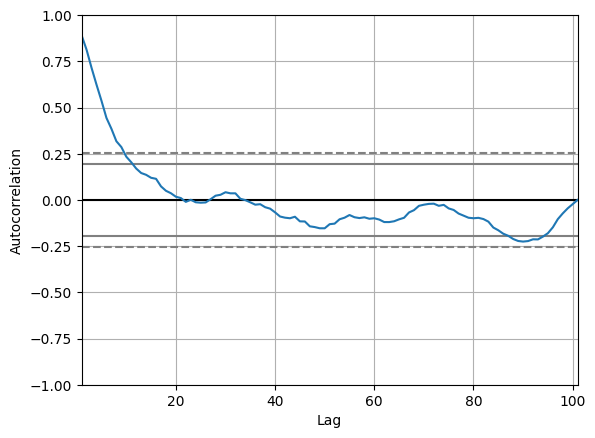

In [42]:
pd.plotting.autocorrelation_plot(sample_poor)

                               SARIMAX Results                                
Dep. Variable:                      1   No. Observations:                  101
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -219.673
Date:                Wed, 21 Aug 2024   AIC                            445.346
Time:                        14:50:47   BIC                            453.161
Sample:                             0   HQIC                           448.509
                                - 101                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4761      0.294     -1.618      0.106      -1.053       0.101
ma.L1          0.1836      0.309      0.595      0.552      -0.421       0.789
sigma2         4.7327      0.713      6.637      0.0

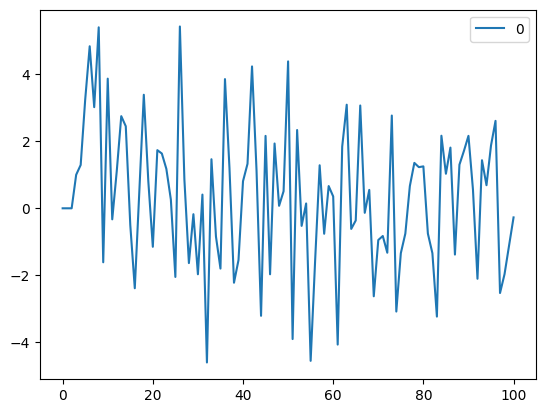

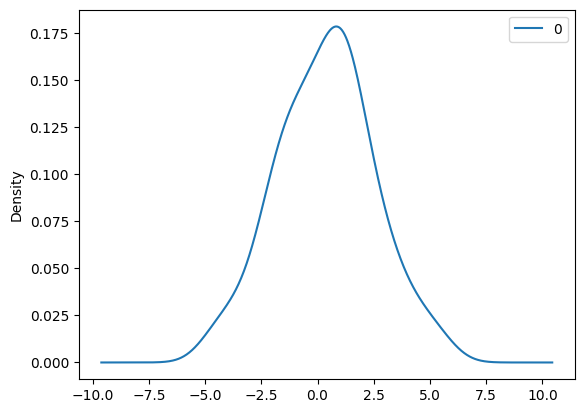

                0
count  101.000000
mean     0.357681
std      2.145573
min     -4.598950
25%     -1.148081
50%      0.510365
75%      1.713396
max      5.423683


In [46]:
model = ARIMA(sample_poor, order=(1,1,1))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

# Hidden Markov Model

In [ ]:
sc = StandardScaler()
bank_reserves_HMM = pd.DataFrame()
bank_reserves_HMM_std = pd.DataFrame()
for i in np.arange(0, poor.shape[0]):
    sample = pd.concat((poor.iloc[i], middle.iloc[i]), axis=1)
    sample = pd.concat((sample, rich.iloc[i]), axis=1)
    sample_std = sc.fit_transform(sample)
    sample_HMM = np.fft.fftn(sample)
    sample_HMM_std = np.fft.fftn(sample_std)
    bank_reserves_HMM = pd.concat([bank_reserves_HMM, (pd.Series(sample_HMM[0:9].flatten()))], axis=1)
    bank_reserves_HMM_std = pd.concat([bank_reserves_HMM_std, (pd.Series(sample_HMM_std[0:9].flatten()))], axis=1)